<a href="https://colab.research.google.com/github/llwusill/FirePredictionCNN/blob/main/Fire_Prediction_CNN_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Fire Detection

Bu projede CNN, Random Forest Classifer , SVM ve Naive Bayes gibi çeşitli makine öğrenimi modellerini eğitmek için bir dizi görüntü kullanıyoruz. Ayrıca modellerin tahminlerini ve doğruluğunu da kontrol ediyoruz.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* tensorflow: TensorFlow, derin öğrenme ve numerik hesaplama için açık kaynaklı bir kütüphanedir. Veri akış grafikleri oluşturarak hesaplamaları ifade etmenize ve bunları çeşitli donanımlarda (CPU, GPU, TPU(tensor process unit)) çalıştırmanıza olanak tanır.

* numpy: Numpy, bilimsel hesaplama için temel bir yapı taşıdır. Verileri çok boyutlu dizilerde organize etmenize ve hızlı matematiksel işlemler yapmanıza olanak tanır.

* keras: Keras, TensorFlow'nun üst düzey bir API'yıdır ve derin öğrenme modellerini daha kolay ve hızlı bir şekilde oluşturmanızı sağlar. Sinirsel ağlar, konvolüsyon ağları, yineleyen ağlar ve dahası gibi çeşitli model mimarileri sunar.

* os: İşletim sistemi ile etkileşim kurmak için kullanılan kütüphane. Dosya ve dizin oluşturma, erişme, silme gibi işlemleri gerçekleştirmenize olanak tanır.

* cv2: OpenCV, bilgisayarlı görme uygulamaları için popüler bir kütüphanedir. Görüntü yükleme, filtre uygulama, nesne algılama gibi işlemleri gerçekleştirmenize olanak tanır.

* ImageDataGenerator: TensorFlow'nun bir parçası olan bu kütüphane, görüntüler üzerinde veri artırımı yapmak için kullanılır. Görüntüleri döndürme, kaydırma, parlaklık/kontrast ayarlaması gibi işlemlerle veri setinizi artırır.

* image: TensorFlow'nun bir parçası olan bu kütüphane, Görüntü dosyalarını yükleme, boyutlarını değiştirme, kanallarını dönüştürme gibi işlemleri gerçekleştirmenize olanak tanır.

* matplotlib.pyplot: Matplotlib, veri görselleştirme için popüler bir kütüphanedir. Grafikler, çizgiler, histogram'lar, dağılım grafikleri gibi görseller oluşturarak verilerinizi görsel olarak analiz etmemizi sağlar.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

rescale fonksiyonu girilen görüntülerin piksel değerlerini 0 ile 1 arasında yeniden ölçeklendirir. Bu işlem sırasında görüntüleri yatay ve dikey olarak çevirme(rastgele), parlaklık ve konstrat ayarı yapma(rastgele), yakınlaştırma ve uzaklaştırma gibi işlemleri uygular.

In [ ]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

aşağıdaki kodlar;
 * belirtilen dizindeki tüm görselleri çeker
 ```
 çektiği görselleri 150x150 olacak şekilde boyutlandırır
 dosyanın içinde iki sınıf olduğu için binary olarak kull-
 anırız. çekilen verileri büyüklüklerine göre ayarlamak
 için de batch_size kullanırız.

 batch_size'ın 32 olmasının sebebi : Bu değer, çoğu GPU'da
 ve CPU'da çalışacak kadar büyüktür, ancak aynı zamanda
 bellek kullanımını da makul bir seviyede tutar.
 ```

In [ ]:
#Dataset import
train_dataset = train.flow_from_directory("/content/drive/MyDrive/forest_fire/Training and Validation",target_size=(150,150), batch_size = 32, class_mode = 'binary')
test_dataset = test.flow_from_directory("/content/drive/MyDrive/forest_fire/Testing", target_size = (150,150), batch_size = 32, class_mode = 'binary')

Found 1852 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


datasetimizin sınıflarının oluşturulup oluşturulmadığını kontrol ettiğimiz kod. Oluşturulduysa aktardığı sayıyı görürüz.

In [ ]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

# CNN model

CNN modeli nedir?

```
Convolutional Neural Network (CNN), görüntü işleme ve bilgisayar görüşünde yaygın olarak kullanılan bir tür yapay sinir ağıdır.
 CNN'ler, görüntülerin yerel özelliklerini yakalamak
 için konvolüsyon adı verilen bir işlem kullanır. Konvolüsyon,
 bir filtrenin görüntünün bir penceresine uygulanması ve
 filtrenin ağırlıkları ile penceredeki piksellerin
 çarpılmasından oluşur. Bu, filtrenin ağırlıkları
 tarafından temsil edilen özellikleri vurgulayan yeni bir
 görüntü oluşturur.
```



Görüntü işlemede konvülasyon

Görüntü işlemede konvülasyon, görüntülerden özellik çıkarmak için kullanılır. Örneğin, konvülasyon, görüntülerdeki kenarların, dokuların ve şekillerin tespiti için kullanılabilir.

Görüntü işlemede konvülasyon işlemini gerçekleştirmek için, genellikle konvülasyon matrisi adı verilen bir filtre kullanılır. Konvülasyon matrisi, filtrenin her bir konumunda kullanılacak ağırlıkları içeren bir matristir.

Görüntü işlemede konvülasyon işlemi şu şekilde gerçekleşir:

Konvülasyon matrisi, görüntünün üzerine yerleştirilir.
Konvülasyon matrisinin her bir konumunda, filtrenin değerleri ve görüntüdeki karşılık gelen değerlerin çarpımı hesaplanır.
Bu çarpımlar toplanarak, filtrenin görüntü üzerindeki etkisi hesaplanır.

In [ ]:
model = keras.Sequential() #model üstünde konvülasyon ve pooling işlemlerini kullanmamızı sağlayan fonksiyon 2
                           #model nesnesini sequential olarak atamadan konvülasyon ve pooling işlemide yapabiliriz ancak 2
                           #Keras'ın fonksiyonel API'yı daha karmaşık mimariler oluşturma olanağı sağlar.  2
model.add(keras.layers.Conv2D(32,
                              (3,3),
                              activation='relu',
                              input_shape=(150,150,3)))
#bu katman 32 adet 3x3 boyutunda filtre kullanarak görüntüyü işler. 'relu' aktivasyon fonksiyonu
#pozitif değerleri korur ve negatif değerleri 0 yapar. input_shape : modelin giriş boyutlarını belirtir

model.add(keras.layers.MaxPool2D(2,2))
#bu katman 2x2 boyutuyla görüntüleri tara ve ne büyük değeri çıkarır.
#bu görüntüyü küçülterek önemli özellikler vurgulamaya yardımcı olur

model.add(keras.layers.Conv2D(64,
                              (3,3),
                              activation='relu'))
#ilk katmanın aynısı ancak daha fazla filtreleme işlemi mevcut (64). bu filtreleme modelin daha karmaşık
#desenleri algılamasını sağlayacak.

#yukarıdaki adımlar aşağıda devam ederek modelin karmaşık işleri algılama gücü arttırılıyor.

model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,
                              (3,3),
                              activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,
                              (3,3),
                              activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
#çok katmanlı verilerimizi düzleştirerek tam bağlı katmanların kullanımına olanak sağlar.

model.add(keras.layers.Dense(512,activation='relu'))
#bu satır 512 nörondan oluşan tam bağlı bir katman ekler. Düzleştirdiğimiz katman özelliklerini
#yüksek boyutlu hale getirir. relu aktivasyonu ile tekrardan negatif değerleri 0'a eşitleyip
#pozitif değerleri koruruz.

model.add(keras.layers.Dense(1, activation='sigmoid'))
#tek bir nöron ile son tam bağlı katman ekler(çıkış nöron).Bu katmanda model tahminini sunar.
#sigmoid aktivasyonu çıktı değerini 0-1 arasıdna değerlendirir ve sınıflandırma yapar.

Keras CNN modelini eğitim için uygun şartlara hazırlamak için kullanılır.
 * Optimizer, modelin ağırlıklarını güncelleyerek öğrenmesini sağlayan algoritmadır. adam, yaygın olarak kullanılan bir optimizördür ve genellikle iyi performans gösterir.

 * Loss fonksiyonu, modelin tahminlerinin gerçek değerlerden ne kadar uzakta olduğunu ölçen bir metriktir. "binary_crossentropy", iki sınıflı sınıflandırma problemleri için uygun bir loss fonksiyonudur.

 * Metric'ler, modelin performansını değerlendirmek için kullanılan ek ölçümlerdir. accuracy, tahminlerin doğruluk yüzdesini hesaplayan yaygın bir metriktir.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# 2 sınıflı ayrıştırma yaptığımız için binary_crossentropy kullandık
# 2'den fazla sınıf için categorical_crossentropy kullanmamız gerekirdi

* model.fit: Bu, Keras'ta modeli eğitmek için kullanılan temel fonksiyondur.

* train_dataset: Bu, daha önce oluşturduğunuz ImageDataGenerator nesnesi ve flow_from_directory metodu aracılığıyla oluşturulan eğitim verisidir. Bu akış, modelin her eğitim adımı için rastgele seçilmiş bir grup görüntü ve bunların sınıf bilgisini alır. Sınıf bilgisini klasör içerisinde görülen klasör isimlerinden alır.

* epochs = 60: Bu, modelin eğitim verilerini kaç kez tekrar görmesi gerektiğini belirtir. Bu durumda, model eğitim verilerini 60 kez tekrar görecek ve her tekrarı bir epoch olarak nitelendirdilir. Bu sayının çok yüksek olması bir işe yaramaz ama düşükte olmaması gerekir. Düşük olması yeterli verimliliği sağlamayabilir. Fazla olması da vakit kaybına yol açacaktır. Ancak sistem her epochs'tan sonra değerleri karşılaştırarak gereksiz işlem yapılmasını engeller ve size en iyi değer ... 'te elde edildi daha fazla tekrar yapılmasına gerek yok gibi bir geri dönüş sağlar.

* validation_data = test_dataset: Bu, modelin performansını değerlendirmek için kullanılan doğrulama verisi akışıdır. Bu akış, eğitim verisine benzer şekilde oluşturulur, ancak modelin eğitim sırasında gördüğü verilerden farklı olmalıdır.

In [ ]:
CNN_Model = model.fit(train_dataset, epochs = 60, validation_data = test_dataset)

In [ ]:
loss, accuracy = model.evaluate(test_dataset)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

3/3 [==============================] - 0s 51ms/step - loss: 0.5994 - accuracy: 0.9706
Accuracy: 0.970588207244873
Loss: 0.5993629693984985



Bu kod satırı, eğitimli CNN modelinizin tahminlerini yapar ve test veri setindeki her görüntü için modelin tahminlerini içeren bir prediction dizisini oluşturur.
dizinin eleman sayısını len ile öğreniriz.

In [ ]:
prediction = model.predict(test_dataset)
print('Length :', len(prediction))

3/3 [==============================] - 0s 55ms/step
Length : 68


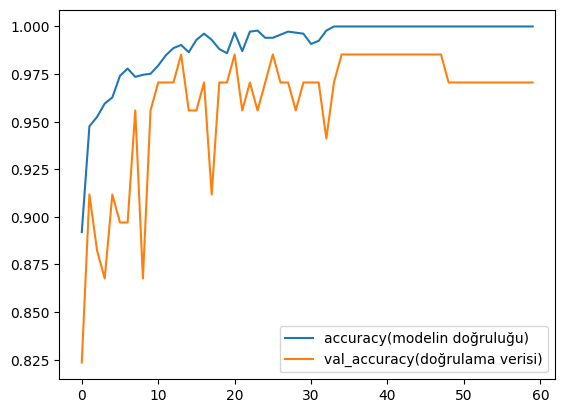

In [ ]:
plt.plot(CNN_Model.history['accuracy'], label='accuracy(modelin doğruluğu)')
plt.plot(CNN_Model.history['val_accuracy'], label='val_accuracy(doğrulama verisi)')
plt.legend()

Aşağıdaki fonskyion belirttiğimiz dosya konumundaki görselin modele göre tahmin edilmesi içindir.

* img = image.load_img(filename,target_size=(150,150)): Bu satır, filename ile belirtilen dosyadan görüntüyü yükler ve target_size=(150,150) ile boyutunu değiştirir. Bu boyut, modelinizin beklediği boyuttur.

* plt.imshow(img): Bu satır yüklediğiniz görüntüyü ekrana görüntüler.

* Y = image.img_to_array(img): Bu satır görüntüyü bir Numpy dizisine dönüştürür.

* X = np.expand_dims(Y,axis=0): Bu satır, Numpy dizisini modelinizin beklediği 4 boyutlu tensöre dönüştürür. Bunun için diziye (1, 150, 150, 3) boyutlarında bir boyut daha eklenir.

* val = model.predict(X): Bu satır, modelinizin X tensoru üzerinde tahmin yapmasını sağlar ve tahmini 'val' değişkenine kaydeder.



In [ ]:
def predictImage(filename):
    img = image.load_img(filename,target_size=(150,150))
    plt.imshow(img)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 366ms/step


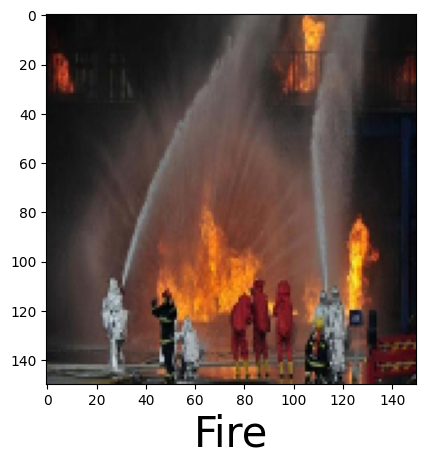

In [ ]:
predictImage("/content/drive/MyDrive/Forest_Fire/Fire-Detector-2/test/images/fire-149_png.rf.5c0f3da3f12ef02cff4efc8f2a55e199.jpg")

1/1 [==============================] - 0s 31ms/step


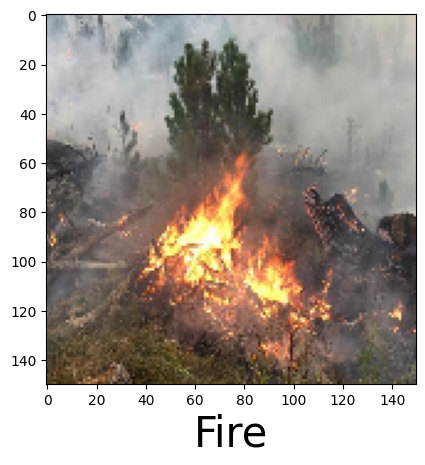

In [ ]:
predictImage("/content/drive/MyDrive/Forest_Fire/Fire-Detector-2/test/images/fire-115_png.rf.bd3d8f1792cbf40898e53feac86c8645.jpg")

1/1 [==============================] - 0s 28ms/step


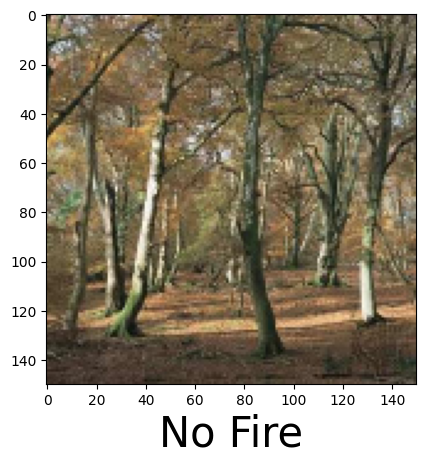

In [ ]:
predictImage("/content/drive/MyDrive/Forest_Fire/Fire-Detector-2/test/images/non_fire-96_png.rf.2b9923c4d588b7a4f39eada2d6c3129c.jpg")

1/1 [==============================] - 0s 65ms/step


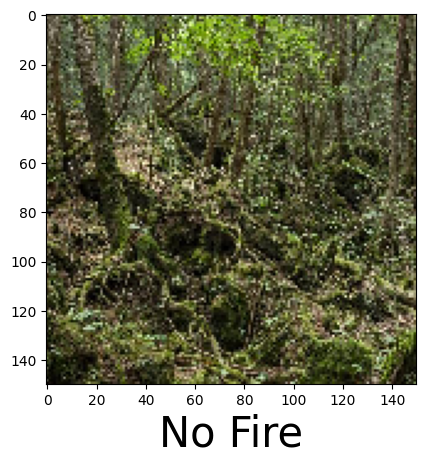

In [ ]:
predictImage("/content/drive/MyDrive/Forest_Fire/Fire-Detector-2/test/images/non_fire-147_png.rf.1095bcf97163b9e5fe4f0b3405122731.jpg")

# Random Forest Classifier

In [ ]:
Train = "/content/drive/MyDrive/forest_fire/Training and Validation"
Test = "/content/drive/MyDrive/forest_fire/Testing"

* tqdm: Bu kütüphane, ilerlemeyi gösteren bir ilerleme çubuğu oluşturur. Bu, özellikle uzun işlemler sırasında kullanışlıdır. Dosya içerisinden birden fazla görsel çekerken kullanacağız.

* sklearn: Bu kütüphane, makine öğrenimi için kullanılan birçok algoritma ve araç içerir. Veri analizi, tahmin ve sınıflandırma gibi görevlerde kullanılabilir.

* skimage: Bu kütüphane, görüntü işleme için kullanılan birçok fonksiyon içerir. Görüntüleri yeniden boyutlandırma, filtre uygulama ve özellik çıkarma gibi görevlerde kullanılabilir.

* resize: Bu fonksiyon, bir resmi belirli bir boyuta yeniden boyutlandırır. Örneğin, bir resmi 28x28 piksele yeniden boyutlandırmak isteyebilirsiniz.

* random: Bu kütüphane, rastgele sayılar üretmek için kullanılır. Örneğin, verilerinizden rastgele örnekler seçmek isteyebilirsiniz.

* accuracy_score: Bu fonksiyon, bir sınıflandırma modelinin doğruluğunu hesaplar. Modelinizin ne kadar iyi performans gösterdiğini görmek için kullanılabilir.

* sns: Bu kütüphane, verileri görselleştirmek için kullanılır. Verilerinizi çizgi grafikler, ısı haritaları ve diğer görseller olarak sunabilirsiniz.

* set: Bu fonksiyon, sns kütüphanesinde varsayılan çizim stilini ayarlamak için kullanılır.

In [ ]:
from tqdm import tqdm
import sklearn
import skimage
from skimage.transform import resize
import random
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

#Random Forest Classifer
 * Birden çok karar ağacını birleştirerek sınıflandırma ve regresyon için çok yönlü öğrenme sağlayan bir modeldir.

 * Toplu öğrenme yaparak modelin tahmin gücünü arttırır.

 * Karar ağaçlarını kullanarak verileri özelliklerine göre dallara ayırır.

 * Özelliklerin rastgele bir alt kümesi dikkate alınır bu da ağaçları daha da çeşitlendirir ve benzer olmalarını önler.

 * Yüksek uyumluluk, karmaşık işleri çözebilme, eksik verileri işleme gibi özelliklere sahiptir.

In [ ]:
LOAD_FROM_IMAGES = True
def get_data(folder): #dosyadan verileri çeker.
    x = []
    y = []

#belirtilen klasör içindeki her alt klasörü gezer.
    for folderName in os.listdir(folder):
        if not folderName.startswith("."): #. ile başlayan gizli klasörleri atlaması içindir.
            #alt klasör adlarına göre etiketleme yapılan kısım
            if folderName in ["nofire"]:
                label = 0
            elif folderName in ["fire"]:
                label = 1
            else:
                label = 2
            #alt klasördeki görüntüleri işlemek:
            #Görüntünün başarıyla okunup okunmadığını kontrol eder (if img_file is not None:).
            #Görüntüyü scikit-image (skimage.transform.resize) kullanarak 227x227x3 piksele yeniden boyutlandırır.
            for image_filename in tqdm(os.listdir(folder +"/" +folderName+"/")):
                img_file = cv2.imread(folder + "/" +folderName + "/" + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file,(227,227,3), mode = "constant",anti_aliasing=True)
                    img_arr = np.asarray(img_file)
                    x.append(img_arr)
                    y.append(label)
    x = np.asarray(x)
    y = np.asarray(y)
    return x,y

if LOAD_FROM_IMAGES: #eğer veriler yukarıda sorunsuz yüklendiyse, aşağıdaki verileri atarız.
    X_train,y_train = get_data(Train)
    X_test, y_test = get_data(Test)

    np.save("xtrain.npy",X_train) #klasöre "..." isminde kayıt yapar.
    np.save("ytrain.npy",y_train)
    np.save("xtest.npy",X_test)
    np.save("ytest.npy",y_test)
else:
    X_train = np.load("xtrain.npy")
    y_train = np.load("ytrain.npy")
    X_test = np.load("xtest.npy")
    y_test = np.load("ytest.npy")

X_train, X_test = X_train / 255.0, X_test / 255.0 #x ve y sütunundaki verileri 255'e bölerek görsellerin sayısal değerlerini 0 ile 1 arasında normlize edilir.

100%|██████████| 46/46 [00:00<00:00, 54.21it/s]


In [ ]:
X_train.shape

(1852, 227, 227, 3)

In [ ]:
a,b,c,d = X_train.shape

In [ ]:
A,B,C,D = X_test.shape
X_test = X_test.reshape(-1, B*C*D)
#-1 boyutu matrix'e gerekli alanı otomatik seçmesi içindir.

In [ ]:
X_train = X_train.reshape(-1, b*c*d)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
print("Random forest model accuracy:", model.score(X_test, y_test)*100)

Random forest model accuracy: 88.23529411764706


In [ ]:
y_predicted= model.predict(X_test)

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 82.35294117647058


# SVM algorithm

In [ ]:
from sklearn.svm import SVC

In [ ]:
Modelsvm = SVC(C=10, gamma =10)

In [ ]:
Modelsvm.fit(X_train, y_train)

SVC(C=10, gamma=10)

In [ ]:
print( "SVM model accuracy:", Modelsvm.score(X_test,y_test)*100)

SVM model accuracy: 94.11764705882352
